In [29]:
path="fashion_data/"

import gzip
import numpy as np
import torch
from torch import nn

label_file=gzip.open(path + 'train-labels-idx1-ubyte.gz')
y_train= np.frombuffer(label_file.read(), dtype=np.uint8, offset=8)

image_file=gzip.open(path + 'train-images-idx3-ubyte.gz', 'rb')
x_train= np.frombuffer(image_file.read(), dtype=np.uint8, offset=16).reshape(len(y_train), 784)

valid_label_file=gzip.open(path + 't10k-labels-idx1-ubyte.gz')
y_valid= np.frombuffer(valid_label_file.read(), dtype=np.uint8, offset=8)

valid_image_file=gzip.open(path + 't10k-images-idx3-ubyte.gz', 'rb')
x_valid= np.frombuffer(valid_image_file.read(), dtype=np.uint8, offset=16).reshape(len(y_valid), 784)

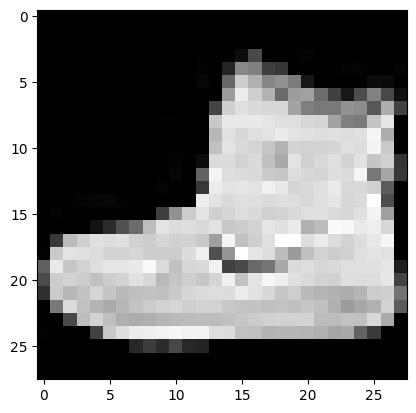

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [31]:
y_train[0]

9

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [32]:
x_train[0].shape

(784,)

In [34]:
x_train = torch.tensor(x_train, dtype=torch.float)
x_test = torch.tensor(x_valid, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_valid, dtype=torch.long)

/tmp/ipykernel_3557/3287618670.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float)


In [40]:
class fully_connected(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(fully_connected, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

        self.bn1 = nn.BatchNorm1d(hidden_size)

    def forward(self, xb):
        #print('xb.shape: ', xb.shape)
        z2 = self.fc1(xb)
        #print('z2.shape: ', z2.shape)
        a2 = torch.relu(z2)
        #print('a2.shape: ', a2.shape)
        a2_bn = self.bn1(a2)
        #print('a2_bn.shape: ', a2_bn.shape)

        y_hat = self.fc2(a2_bn)
        #print('y_hat.shape: ', y_hat.shape)

        return y_hat

In [41]:
def get_batch(x, y, batch_size):
    for i in range(0, x.shape[0], batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]

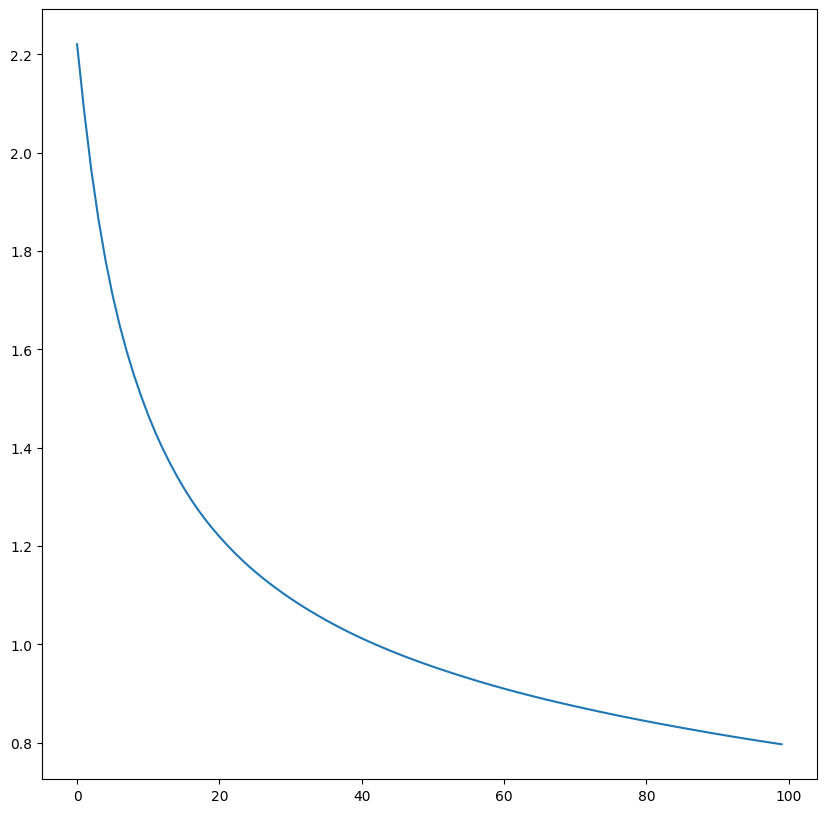

In [47]:
model = fully_connected(input_size=784, hidden_size=128, output_size=10)
loss = nn.CrossEntropyLoss()
lr = 0.0001
batch_size = 1024

def train(xb, yb):
    y_hat = model(xb)
    loss_value = loss(y_hat, yb)
    loss_value.backward()
    with torch.no_grad():
        for p in model.parameters():
            p -= p.grad * lr
        model.zero_grad()
    return loss_value.item()

losses = []
for epoch in range(100):
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_value = train(xb, yb)
    losses.append(loss_value)


plt.figure(figsize=(10, 10))
plt.plot(losses)

In [46]:
get_accuracy(x_train, y_train)

NameError: name 'get_accuracy' is not defined

In [43]:
# testing the model
def accuracy(xb, yb):
    y_hat = model(xb)
    y_hat = torch.argmax(y_hat, dim=1)
    return (y_hat==yb).float().mean()

accuracy(x_valid, y_valid)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [44]:
def visualize(xb, yb):
    y_hat = model(xb)
    y_hat = torch.argmax(y_hat, dim=1)
    for i in range(100):
        plt.rcParams["figure.figsize"] = (18,18)
        plt.subplot(10, 10, i+1)
        plt.imshow(xb[i].reshape((28, 28)))
        plt.title('y_hat: {}, y: {}'.format(y_hat[i], yb[i]))
        plt.axis('off')

visualize(x_valid[:100], y_valid[:100])

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray